# IEFI Aprendizaje automatico 2.

### Parte Práctica
El  DataSet abalone_alumno.csv corresponde a datos sobre las “orejas de mar”, gasterópodos marinos del género Haliotis. Es posible calcular su edad contando los anillos o Rings, de tal forma que cada anillo equivale a 1,5 años de edad. Sin embargo el proceso de contar estos anillos es complicado, nuestra intención es ver si podemos pronosticar la cantidad de anillos en base a otras features que son fáciles de medir, como las provistas en el dataset.

Ya que el número de anillos es un valor entero y continuo se pueden usar modelos de regresión o de clasificación, en este caso vamos a elegir los de clasificación.
1. Vamos a armar un Ensemble con un esquema de votación adecuado compuesto por los siguientes modelos:
  * Regresión Logistica con Ridge
  * SVM
  * kNN
  * RandomForest 
2. Mediante el uso de GridSearchCV deberá calcular qué Accuracy, y su margen de error para 3 desvíos estándar, obtenemos con este ensemble para nuestro problema. 

3. Crear y graficar las curvas de aprendizaje para el modelo con los hiperparámetros obtenidos del paso anterior con porcentajes de datos de 5% en 5% hasta el 100%, (recordar crear el modelo de nuevo para que no guarde información del entrenamiento anterior)

4. Escribir una conclusión del rendimiento del modelo


In [43]:
#Evitamos que salgan mensajes de advertencia. 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#conectar drive con colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
#Importamos las librerias que vamos a usar. 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [4]:
#Archivo importado desde google drive, cambiar ubicacion de carpeta a la hora de ejecutar celda 
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automatico II/IEFI/data/abalone_alumno.csv', sep=',')
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0,1,0


In [5]:
#dividimos conjunto de datos en x e y
X=df.drop(['Rings'], axis='columns')
y=df[['Rings']]

In [6]:
# desordenamos los datos un poco
from sklearn.utils import shuffle
X,y=shuffle(X,y, random_state=123)

In [7]:
#Separamos en train y test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

## Comienzo de entrenamiendo de validacion. 
En esta parte del trabajo lo que hacemos es dividir los datos en train y test y generamos un `GridSearchCV` para cada uno de los modelos de esta forma podemos buscar cuales son los mejores *Hiperparametros* que conseguimos. 

Luego de eso al final presentamos los mejores **Hiperparametros** de cada modelo y los resultados de **Accurracy** conseguidos.

### Regresion logistica con Ridge

In [8]:
# Creamos el modelo con los parámetros que no cambiarán, observe que no le pasamos el valor de C de regulrización
Log_Ridge = LogisticRegression(penalty='l2', max_iter=10000) 

# Armamos el diccionario con el  nombre y valores para los Hiperparámetros
parametros_RL = {'C':[1e-6,1e-5,1e-4,0.001,0.01,0.1,1,10],
                   'tol' : [0.0001, 0.001, 0.01, 0,1]}   

# Armamos el GridSearchCV
grid_RL = GridSearchCV(estimator = Log_Ridge,param_grid = parametros_RL,scoring = 'accuracy', cv = 5, verbose = 1,
                        n_jobs = -1)

# Lo entrenamos en el Train Set (él lo dividirá internamente y en cada fold estarán en ValTrain y ValTest)
grid_RL.fit(X_train, y_train);

# Acc
AC_RegLog_best = grid_RL.best_score_

#Parametros
parametros_RegLog_best = grid_RL.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### kNN

In [9]:
# kNN 

# Creamos el modelo con los parámetros que no cambiarán, observe que no le pasamos el valor de C de regulrización
knn=KNeighborsClassifier(n_jobs=-1)

# Armamos el diccionario con el  nombre y valores para los Hiperparámetros
parametros_kNN = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
                   'p' : [1,2]}   

# Armamos el GridSearchCV
grid_kNN = GridSearchCV(estimator = knn, param_grid = parametros_kNN,scoring = 'accuracy', cv = 5, verbose = 1,
                        n_jobs = -1)

# Lo entrenamos en el Train Set (él lo dividirá internamente y en cada fold estarán en ValTrain y ValTest)
grid_kNN.fit(X_train, y_train);

# Acc
AC_kNN_best = grid_kNN.best_score_

#Parametros
parametros_kNN_best = grid_kNN.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### SVM (Support Vector Machines)

In [10]:
# SVM

# Creamos el modelo con los parámetros que no cambiarán, observe que no le pasamos el valor de C de regulrización
svm = SVC( random_state=123)

# Armamos el diccionario con el  nombre y valores para los Hiperparámetros
parametros_svm = {'C' : [1e-2,1e-1,1,1e1]}   

# Armamos el GridSearchCV
grid_svm = GridSearchCV(estimator = svm, param_grid = parametros_svm, scoring = 'accuracy', cv = 5, verbose = 1,
                        n_jobs = -1)

# Lo entrenamos en el Train Set (él lo dividirá internamente y en cada fold estarán en ValTrain y ValTest)
grid_svm.fit(X_train, y_train);

# Acc
AC_svm_best = grid_svm.best_score_

#Parametros
parametros_svm_best = grid_svm.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [11]:
# Random Forest

# Creamos el modelo con los parámetros que no cambiarán, observe que no le pasamos el valor de C de regulrización
rf=RandomForestClassifier(n_jobs=-1, random_state=123)

# Armamos el diccionario con el  nombre y valores para los Hiperparámetros
parametros_rf = {'n_estimators':[100,150,200,250,300,400,500],'criterion' : ['gini', 'entropy', ' log_loss']}   

# Armamos el GridSearchCV
grid_rf = GridSearchCV(estimator = rf, param_grid = parametros_rf, scoring = 'accuracy', cv = 5, verbose = 1,
                        n_jobs = -1)

# Lo entrenamos en el Train Set (él lo dividirá internamente y en cada fold estarán en ValTrain y ValTest)
grid_rf.fit(X_train, y_train);

# Acc
AC_rf_best = grid_rf.best_score_

#Parametros
parametros_rf_best = grid_rf.best_params_

Fitting 5 folds for each of 21 candidates, totalling 105 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/

In [62]:
print("Mejores Accuracy: ")
print(f"RegLog Acc: {AC_RegLog_best}")
print(f"kNN Acc: {AC_kNN_best}")
print(f"SVM Acc: {AC_svm_best}")
print(f"Random Forest Acc: {AC_rf_best}")

Mejores Accuracy: 
RegLog Acc: 0.25785714285714284
kNN Acc: 0.24464285714285716
SVM Acc: 0.25785714285714284
Random Forest Acc: 0.2357142857142857


In [13]:
print("Mejores parametros. ")
print(f"RegLog: {parametros_RegLog_best}")
print(f"kNN: {parametros_kNN_best}")
print(f"SVM: {parametros_svm_best}")
print(f"Random Forest Acc: {parametros_rf_best}")

Mejores parametros. 
RegLog: {'C': 10, 'tol': 0.0001}
kNN: {'n_neighbors': 10, 'p': 2}
SVM: {'C': 10.0}
Random Forest Acc: {'criterion': 'gini', 'n_estimators': 250}


## Ensambler con Votacion.


In [35]:
# Armamos los podelos finales con sus hiperparametros. 

LogRidge = LogisticRegression(penalty='l2', max_iter=10000, C = 10, tol = 0.0001) 
knn=KNeighborsClassifier(n_jobs=-1, n_neighbors = 10, p = 2) 
svm = SVC( random_state=123, C = 10, probability=True)
rf=RandomForestClassifier(n_jobs=-1, random_state=123, n_estimators = 250, criterion= 'gini')

#Armamos el modelo de Votacion. 

modelos=[('LogRidge',LogRidge),('knn',knn),('svm',svm),('rf',rf)]
ensemble=VotingClassifier(estimators=modelos,voting='soft',n_jobs=-1) #, weights=[3,2,3,1]

# Entrenamos el modelo, seguro tarda... 

ensemble.fit(X, y)

#Mostramos los valores del Accurracy.

AC_votacion = ensemble.score(X_test,y_test)
print(f"AC_votacion: {AC_votacion} ")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('LogRidge',
                              LogisticRegression(C=10, max_iter=10000)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=10)),
                             ('svm',
                              SVC(C=10, probability=True, random_state=123)),
                             ('rf',
                              RandomForestClassifier(n_estimators=250,
                                                     n_jobs=-1,
                                                     random_state=123))],
                 n_jobs=-1, voting='soft')

In [36]:
AC_votacion = ensemble.score(X_test,y_test)
print(f"AC_votacion: {AC_votacion} ")

AC_votacion: 0.2742857142857143 


In [41]:
# Armamos los podelos finales con sus hiperparametros. 

LogRidge = LogisticRegression(penalty='l2', max_iter=10000) #, C = 10, tol = 0.0001
knn=KNeighborsClassifier(n_jobs=-1) #, n_neighbors = 10, p = 2
svm = SVC( random_state=123, probability=True) #, C = 10
rf=RandomForestClassifier(n_jobs=-1, random_state=123) #, n_estimators = 250, criterion= 'gini'

# Armamos el ensamblador.

hiperparametros={}
hiperparametros['LogRidge__C']= [10]
hiperparametros['LogRidge__tol']= [0.0001]

hiperparametros['knn__n_neighbors'] = [10]
hiperparametros['knn__p'] = [2]

hiperparametros['svm__C'] = [10]

hiperparametros['rf__criterion'] = ['gini']
hiperparametros['rf__n_estimators'] = [250]


#Armamos el modelo de Votacion. 

modelos=[('LogRidge',LogRidge),('knn',knn),('svm',svm),('rf',rf)]
ensemble=VotingClassifier(estimators=modelos,voting='soft',n_jobs=-1) #, weights=[3,2,3,1]

# esto va a demorar ...
grid_ensemble= GridSearchCV(estimator=ensemble, param_grid=hiperparametros, cv=5,n_jobs=-1, return_train_score=True)

# esto va a demorar ...
grid_ensemble.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('LogRidge',
                                                     LogisticRegression(max_iter=10000)),
                                                    ('knn',
                                                     KNeighborsClassifier(n_jobs=-1)),
                                                    ('svm',
                                                     SVC(probability=True,
                                                         random_state=123)),
                                                    ('rf',
                                                     RandomForestClassifier(n_jobs=-1,
                                                                            random_state=123))],
                                        n_jobs=-1, voting='soft'),
             n_jobs=-1,
             param_grid={'LogRidge__C': [10], 'LogRidge__tol': [0.0001],
                         'knn__n_neighbors': [10], 'knn__p':

In [63]:
grid_ensemble.best_params_

{'LogRidge__C': 10,
 'LogRidge__tol': 0.0001,
 'knn__n_neighbors': 10,
 'knn__p': 2,
 'rf__criterion': 'gini',
 'rf__n_estimators': 250,
 'svm__C': 10}

In [57]:
Acc_media = grid_ensemble.best_score_.mean()
Acc_media

0.24628571428571427

In [58]:
desvio=grid_ensemble.best_score_.std()
desvio

0.0

In [59]:
print("Acc = ",grid_ensemble.best_score_, " +/- ",3*desvio, " (99%)" )

Acc =  0.24628571428571427  +/-  0.0  (99%)


## Learning Curves

En esta parte del trabajo lo que vamos a hacer es armar un conjunto de datos para ir viendo como el modelo va a prandiendo a medida que se le agrega informacion. Vamos a arrancar entrenando con el 5% del conjunto hasta completar el 100 % de los datos.

In [45]:
tamanos_train = np.linspace(0.05, 1.0, 20)

# Generamos el conjunto de datos para poder sacar el accuracy de la media de los entrenamientos con el aumento de variables. 

train_sizes_abs, train_scores, test_scores = learning_curve(grid_ensemble, X, y, train_sizes=tamanos_train, cv=5,scoring='accuracy',shuffle=True)

In [47]:
# Media de las observaciones del train
mean_train_scores = np.mean(train_scores, axis=1)
mean_train_scores

array([0.85857143, 0.88357143, 0.8547619 , 0.855     , 0.864     ,
       0.86904762, 0.86578141, 0.85535714, 0.8573471 , 0.8571837 ,
       0.85679012, 0.86059524, 0.85978022, 0.86105156, 0.85714286,
       0.85526786, 0.85605042, 0.85785714, 0.85902256, 0.86107143])

In [49]:
# Media de las observaciones del test

mean_test_scores = np.mean(test_scores, axis=1)
mean_test_scores

array([0.22971429, 0.23971429, 0.24885714, 0.24857143, 0.23771429,
       0.248     , 0.24828571, 0.252     , 0.24514286, 0.25142857,
       0.24828571, 0.25142857, 0.25142857, 0.25657143, 0.256     ,
       0.25571429, 0.258     , 0.25371429, 0.24857143, 0.25171429])

In [52]:
# Armamos un df con la cantidad de observaciones que tenemos y lo valores de sus Accuracys.

df_learning_curves=pd.DataFrame()
df_learning_curves['observaciones'] = train_sizes_abs
df_learning_curves['train_Acc'] = mean_train_scores
df_learning_curves['test_Acc'] = mean_test_scores
    
df_learning_curves

,observaciones,train_Acc,test_Acc
0,140,0.858571,0.229714
1,280,0.883571,0.239714
2,420,0.854762,0.248857
3,560,0.855000,0.248571
4,700,0.864000,0.237714
5,840,0.869048,0.248000
6,979,0.865781,0.248286
7,1120,0.855357,0.252000
8,1259,0.857347,0.245143
9,1399,0.857184,0.251429


Text(0, 0.5, 'Accuracy')

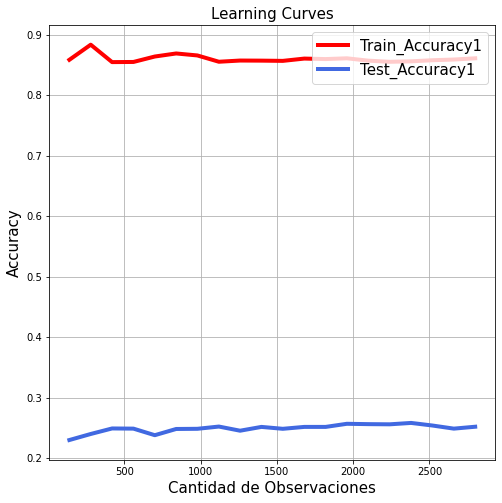

In [61]:
#Graficando las Learning Curves
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.title("Learning Curves", size=15)

axes.plot(df_learning_curves['observaciones'],df_learning_curves['train_Acc'], "red",  linewidth=4,label="Train_Accuracy1")
axes.plot(df_learning_curves['observaciones'],df_learning_curves['test_Acc'], "royalblue",  linewidth=4, label="Test_Accuracy1")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Accuracy', size=15)

## Concluciones.

1. Lo que podemos notar es que el entrenamiento de los modelos que usan ensamble y Grid al tener muchos Hiperparametro son muy pero muy lintes de entrenar, necesitamos tener una buena capacidad de computo para que funcionen rapido. 

2. En el caso de la curva de aprendizaje lo que podemos observar en el grafico es que nuestro modelo, esta aprendiendo muy pero muy bien con nustros datos en el **Train** pero, cuando realizamos el testeo con las observaciones que estan en nustro **Test**, dichas observaciones nuestro modelo nunca tuvo contacto, es decir que son observaciones nuevas a pronosticar, el modelo se queda corto y no logra clasificar dichas observaciones teniendo un rendimiento bajo y poco eficiente. 

3. En definitiva los datos con los cuales se realizo el entrenamiento del modelo estan probocando que nuesto modelo proboque `Overfitting` a la hora de pronosticar una nueva prediccion que ingrese. 